# Tyche Example

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [ ]:
!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [1]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/framework/code/tyche/>.
import tyche             as ty

from copy import deepcopy

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [2]:
designs = ty.Designs("../data")

In [3]:
investments = ty.Investments("../data")

### Compile the production and metric functions for each technology in the dataset.

In [4]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [5]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Simple electrolysis,numpy,simple_electrolysis,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [6]:
designs.indices

Offset  Description Notes
Technology          Type    Index                                 
Simple electrolysis Capital Catalyst          0     Catalyst      
                    Fixed   Rent              0         Rent      
                    Input   Electricity       1  Electricity      
                            Water             0        Water      
                    Metric  Jobs              0         Jobs      
                    Output  Hydrogen          1     Hydrogen      
                            Oxygen            0       Oxygen

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [7]:
designs.designs

Value  \
Technology          Scenario                          Variable          Index                                                       
Simple electrolysis Base Electrolysis                 Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity                                          0.85   
                                                                        Water                                                0.95   
                                                      Input price       Electricity                                       3.33e-5   
                                                                        Water                                              4.8e-3   
                                                      Lifetime          Catalyst                                                3   
                                                      Output efficiency Hydrogen                                             0.90   
                                                                        Oxygen                                               0.90   
                                                      Output price      Hydrogen                                           1.0e-2   
                                                                        Oxygen                                             3.0e-3   
                                                      Scale             NaN                                                  6650   
                    Fast Progress on Electrolysis     Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity  st.truncnorm(-3, 0.75, loc=0.97, scale=0.04)   
                                                                        Water           st.truncnorm(-3, 2, loc=0.97, scale=0.01)   
                                                      Input price       Electricity                                       3.33e-5   
                                                                        Water                                              4.8e-3   
                                                      Lifetime          Catalyst                                                3   
                                                      Output efficiency Hydrogen              st.beta(3, 2, loc=0.90, scale=0.03)   
                                                                        Oxygen                st.beta(3, 2, loc=0.90, scale=0.06)   
                                                      Output price      Hydrogen                                           1.0e-2   
                                                                        Oxygen                                             3.0e-3   
                                                      Scale             NaN                                                  6650   
                    Moderate Progress on Electrolysis Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity  st.truncnorm(-2, 1.75, loc=0.93, scale=0.04)   
                                                                        Water           st.truncnorm(-2, 3, loc=0.97, scale=0.01)   
                                                      Input price       Electricity                                       3.33e-5   
 

### The `parameters` table contains additional techno-economic parameters for each technology.

In [8]:
designs.parameters

Offset  \
Technology          Scenario                          Parameter                                     
Simple electrolysis Base Electrolysis                 Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Fast Progress on Electrolysis     Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Moderate Progress on Electrolysis Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Slow Progress on Electrolysis     Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   

                                                                                            Value  \
Technology          Scenario                          Parameter                                     
Simple electrolysis Base Electrolysis                 Electricity consumption                 237   
                                                      Hydrogen production                    2.00   
                                                      Jobs                                 1.5e-4   
                                                      Oxygen production                     16.00   
                                                  

### The `results` table specifies the units of measure for results of computations.

In [9]:
designs.results

Units Notes
Technology          Variable Index                   
Simple electrolysis Cost     Cost      USD/mole      
                    Metric   Jobs       job/USD      
                    Output   Hydrogen    g/mole      
                             Oxygen      g/mole

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Cateogry`.

In [10]:
investments.tranches

Notes
Category         Tranche                 Scenario                               
Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis          
                 Low Electrolysis R&D    Slow Progress on Electrolysis          
                 Medium Electrolysis R&D Moderate Progress on Electrolysis      
                 No Electrolysis R&D     Base Electrolysis

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [11]:
investments.investments

,,,Amount,Notes
Investment,Category,Tranche,,
High R&D Spending,Electrolysis R&D,High Electrolysis R&D,5000000.0,
Low R&D Spending,Electrolysis R&D,Low Electrolysis R&D,1000000.0,
Medium R&D Spending,Electrolysis R&D,Medium Electrolysis R&D,2500000.0,
No R&D Spending,Electrolysis R&D,No Electrolysis R&D,0.0,


## Evaluate the scenarios in the dataset.

In [12]:
scenario_results = designs.evaluate_scenarios(sample_count=50)

In [13]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology          Scenario                          Sample Variable Index                 
Simple electrolysis Base Electrolysis                 1      Cost     Cost       0.183900   
                                                             Metric   Jobs       0.000816   
                                                             Output   Hydrogen   1.800796   
                                                                      Oxygen    14.406372   
                    Fast Progress on Electrolysis     1      Cost     Cost       0.183550   
                                                             Metric   Jobs       0.000817   
                                                             Output   Hydrogen   1.893713   
                                                                      Oxygen    15.508845   
                    Moderate Progress on Electrolysis 1      Cost     Cost       0.184645   
                                                             Metric   Jobs       0.000812   
                                                             Output   Hydrogen   1.847211   
                                                                      Oxygen    14.644686   
                    Slow Progress on Electrolysis     1      Cost     Cost       0.182991   
                                                             Metric   Jobs       0.000820   
                                                             Output   Hydrogen   1.851919   
                                                                      Oxygen    15.013122   

                                                                                   Units  
Technology          Scenario                          Sample Variable Index               
Simple electrolysis Base Electrolysis                 1      Cost     Cost      USD/mole  
                                                             Metric   Jobs       job/USD  
                                                             Output   Hydrogen    g/mole  
                                                                      Oxygen      g/mole  
                    Fast Progress on Electrolysis     1      Cost     Cost      USD/mole  
                                                             Metric   Jobs       job/USD  
                                                             Output   Hydrogen    g/mole  
                                                                      Oxygen      g/mole  
                    Moderate Progress on Electrolysis 1      Cost     Cost      USD/mole  
                                                             Metric   Jobs       job/USD  
                                                             Output   Hydrogen    g/mole  
                                                                      Oxygen      g/mole  
                    Slow Progress on Electrolysis     1      Cost     Cost      USD/mole  
                                                             Metric   Jobs       job/USD  
                                                             Output   Hydrogen    g/mole  
                                                                      Oxygen      g/mole

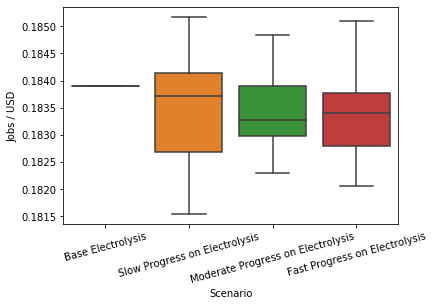

In [14]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs("Cost", level="Variable").reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="Jobs / USD")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Evaluate the investments in the dataset.

In [15]:
investment_results = investments.evaluate_investments(designs, sample_count=3)

### Costs of investments.

In [16]:
investment_results.amounts

,Amount
Investment,
High R&D Spending,5000000.0
Low R&D Spending,1000000.0
Medium R&D Spending,2500000.0
No R&D Spending,0.0


### Benefits of investments.

In [17]:
investment_results.metrics

Value  \
Investment          Category         Tranche                 Scenario                          Sample Technology          Index             
No R&D Spending     Electrolysis R&D No Electrolysis R&D     Base Electrolysis                 1      Simple electrolysis Jobs   0.000816   
                                                                                               2      Simple electrolysis Jobs   0.000816   
                                                                                               3      Simple electrolysis Jobs   0.000816   
High R&D Spending   Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis     1      Simple electrolysis Jobs   0.000814   
                                                                                               2      Simple electrolysis Jobs   0.000817   
                                                                                               3      Simple electrolysis Jobs   0.000821   
Medium R&D Spending Electrolysis R&D Medium Electrolysis R&D Moderate Progress on Electrolysis 1      Simple electrolysis Jobs   0.000815   
                                                                                               2      Simple electrolysis Jobs   0.000818   
                                                                                               3      Simple electrolysis Jobs   0.000818   
Low R&D Spending    Electrolysis R&D Low Electrolysis R&D    Slow Progress on Electrolysis     1      Simple electrolysis Jobs   0.000819   
                                                                                               2      Simple electrolysis Jobs   0.000816   
                                                                                               3      Simple electrolysis Jobs   0.000817   

                                                                                                                                   Units  
Investment          Category         Tranche                 Scenario                          Sample Technology          Index           
No R&D Spending     Electrolysis R&D No Electrolysis R&D     Base Electrolysis                 1      Simple electrolysis Jobs   job/USD  
                                                                                               2      Simple electrolysis Jobs   job/USD  
                                                                                               3      Simple electrolysis Jobs   job/USD  
High R&D Spending   Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis     1      Simple electrolysis Jobs   job/USD  
                                                                                               2      Simple electrolysis Jobs   job/USD  
                                                                                               3      Simple electrolysis Jobs   job/USD  
Medium R&D Spending Electrolysis R&D Medium Electrolysis R&D Moderate Progress on Electrolysis 1      Simple electrolysis Jobs   job/USD  
                                                                                               2      Simple electrolysis Jobs   job/USD  
                                                                                               3      Simple electrolysis Jobs   job/USD  
Low R&D Spending    Electrolysis R&D Low Electrolysis R&D    Slow Progress on Electrolysis     1      Simple electrolysis Jobs   job/USD  
                                                                                               2      Simple electrolysis Jobs   job/USD  
                                                                                               3      Simple electrolysis Jobs   job/USD

In [18]:
investment_results.summary

Value    Units
Investment          Sample Index                   
No R&D Spending     1      Jobs   0.000816  job/USD
                    2      Jobs   0.000816  job/USD
                    3      Jobs   0.000816  job/USD
High R&D Spending   1      Jobs   0.000814  job/USD
                    2      Jobs   0.000817  job/USD
                    3      Jobs   0.000821  job/USD
Medium R&D Spending 1      Jobs   0.000815  job/USD
                    2      Jobs   0.000818  job/USD
                    3      Jobs   0.000818  job/USD
Low R&D Spending    1      Jobs   0.000819  job/USD
                    2      Jobs   0.000816  job/USD
                    3      Jobs   0.000817  job/USD

## Sensitity analysis.

### Vary the four efficiencies in the design.

In [19]:
# Four variables are involved.
variables = [
    ("Input efficiency" , "Water"      ),
    ("Input efficiency" , "Electricity"),
    ("Output efficiency", "Oxygen"     ),
    ("Output efficiency", "Hydrogen"   ),
]

In [20]:
# Let efficiencies range from 0.75 to 0.975.
efficiencies = np.arange(0.750, 1.000, 0.025)
efficiencies

array([0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 ,
       0.975])

### Start from the base case.

In [21]:
base_design = designs.designs.xs("Base Electrolysis", level=1, drop_level=False)
base_design

Value  \
Technology          Scenario          Variable          Index                  
Simple electrolysis Base Electrolysis Input             Electricity      279   
                                                        Water          19.04   
                                      Input efficiency  Electricity     0.85   
                                                        Water           0.95   
                                      Input price       Electricity  3.33e-5   
                                                        Water         4.8e-3   
                                      Lifetime          Catalyst           3   
                                      Output efficiency Hydrogen        0.90   
                                                        Oxygen          0.90   
                                      Output price      Hydrogen      1.0e-2   
                                                        Oxygen        3.0e-3   
                                      Scale             NaN             6650   

                                                                        Units  \
Technology          Scenario          Variable          Index                   
Simple electrolysis Base Electrolysis Input             Electricity   kJ/mole   
                                                        Water          g/mole   
                                      Input efficiency  Electricity         1   
                                                        Water               1   
                                      Input price       Electricity    USD/kJ   
                                                        Water        USD/mole   
                                      Lifetime          Catalyst           yr   
                                      Output efficiency Hydrogen            1   
                                                        Oxygen              1   
                                      Output price      Hydrogen        USD/g   
                                                        Oxygen          USD/g   
                                      Scale             NaN           mole/yr   

                                                                                                     Notes  
Technology          Scenario          Variable          Index                                               
Simple electrolysis Base Electrolysis Input             Electricity                                         
                                                        Water                                               
                                      Input efficiency  Electricity                                         
                                                        Water                                               
                                      Input price       Electricity                                         
                                                        Water                                               
                                      Lifetime          Catalyst     Effective lifetime of Al-Ni catalyst.  
                                      Output efficiency Hydrogen                                            
                                                        Oxygen                                              
                                      Output price      Hydrogen                                            
                                                        Oxygen                                              
                                      Scale             NaN                Rough estimate for a 50W setup.

In [22]:
base_parameters = designs.parameters.xs("Base Electrolysis", level=1, drop_level=False)
base_parameters

Offset  \
Technology          Scenario          Parameter                                     
Simple electrolysis Base Electrolysis Electricity consumption                   3   
                                      Hydrogen production                       1   
                                      Jobs                                      4   
                                      Oxygen production                         0   
                                      Reference capital cost for catalyst       6   
                                      Reference fixed cost for rent             7   
                                      Reference scale                           5   
                                      Water consumption                         2   

                                                                            Value  \
Technology          Scenario          Parameter                                     
Simple electrolysis Base Electrolysis Electricity consumption                 237   
                                      Hydrogen production                    2.00   
                                      Jobs                                 1.5e-4   
                                      Oxygen production                     16.00   
                                      Reference capital cost for catalyst    0.63   
                                      Reference fixed cost for rent          1000   
                                      Reference scale                        6650   
                                      Water consumption                     18.08   

                                                                              Units  \
Technology          Scenario          Parameter                                       
Simple electrolysis Base Electrolysis Electricity consumption                    kJ   
                                      Hydrogen production                         g   
                                      Jobs                                 job/mole   
                                      Oxygen production                           g   
                                      Reference capital cost for catalyst       USD   
                                      Reference fixed cost for rent          USD/yr   
                                      Reference scale                       mole/yr   
                                      Water consumption                           g   

                                                                          Notes  
Technology          Scenario          Parameter                                  
Simple electrolysis Base Electrolysis Electricity consumption                    
                                      Hydrogen production                        
                                      Jobs                                       
                                      Oxygen production                          
                                      Reference capital cost for catalyst        
                                      Reference fixed cost for rent              
                                      Reference scale                            
                                      Water consumption

### Generate the new scenarios and append them to the previous ones.

In [23]:
sensitivities = deepcopy(designs)
sensitivities.designs = sensitivities.designs[0:0]
sensitivities.parameters = sensitivities.parameters[0:0]

In [24]:
# Iterate over variables and efficiencies.
for variable, index in variables:
    for efficiency in efficiencies:

        # Name the scenario.
        scenario = "Let " + variable + " @ " + index + " = " + str(round(efficiency, 3))
        
        # Alter the base case.
        vary_design = base_design.rename(index={"Base Electrolysis" : scenario}, level=1)
        vary_design.loc[("Simple electrolysis", scenario, variable, index), "Value"] = efficiency
        
        # Keep the parameters the same.
        vary_parameters = base_parameters.rename(index={"Base Electrolysis" : scenario}, level=1)
        
        # Append the results to the existing table of scenarios.
        sensitivities.designs = sensitivities.designs.append(vary_design)
        sensitivities.parameters = sensitivities.parameters.append(vary_parameters)

#### Remember to compile the design, since we've added scenarios.

In [25]:
sensitivities.compile()

#### See how many rows there are in the tables now.

In [26]:
sensitivities.designs.shape

(480, 3)

In [27]:
sensitivities.parameters.shape

(320, 4)

In [28]:
sensitivities.designs

Value  \
Technology          Scenario                                 Variable          Index                  
Simple electrolysis Let Input efficiency @ Water = 0.75      Input             Electricity      279   
                                                                               Water          19.04   
                                                             Input efficiency  Electricity     0.85   
                                                                               Water           0.75   
                                                             Input price       Electricity  3.33e-5   
...                                                                                             ...   
                    Let Output efficiency @ Hydrogen = 0.975 Output efficiency Hydrogen       0.975   
                                                                               Oxygen          0.90   
                                                             Output price      Hydrogen      1.0e-2   
                                                                               Oxygen        3.0e-3   
                                                             Scale             NaN             6650   

                                                                                              Units  \
Technology          Scenario                                 Variable          Index                  
Simple electrolysis Let Input efficiency @ Water = 0.75      Input             Electricity  kJ/mole   
                                                                               Water         g/mole   
                                                             Input efficiency  Electricity        1   
                                                                               Water              1   
                                                             Input price       Electricity   USD/kJ   
...                                                                                             ...   
                    Let Output efficiency @ Hydrogen = 0.975 Output efficiency Hydrogen           1   
                                                                               Oxygen             1   
                                                             Output price      Hydrogen       USD/g   
                                                                               Oxygen         USD/g   
                                                             Scale             NaN          mole/yr   

                                                                                                                      Notes  
Technology          Scenario                                 Variable          Index                                         
Simple electrolysis Let Input efficiency @ Water = 0.75      Input             Electricity                                   
                                                                               Water                                         
                                                             Input efficiency  Electricity                                   
                                                                               Water                                         
                                                             Input price       Electricity                                   
...                                                                                                                     ...  
                    Let Output efficiency @ Hydrogen = 0.975 Output efficiency Hydrogen                                      
                                                                               Oxygen                                        
                                                             Output price      Hydrogen                                      
                            

### Compute the results.

In [29]:
results = sensitivities.evaluate_scenarios(1)
results

Value  \
Technology          Scenario                                   Sample Variable Index                 
Simple electrolysis Let Input efficiency @ Electricity = 0.75  1      Cost     Cost       0.190164   
                                                                      Metric   Jobs       0.000789   
                                                                      Output   Hydrogen   1.589241   
                                                                               Oxygen    12.713924   
                    Let Input efficiency @ Electricity = 0.775 1      Cost     Cost       0.188595   
...                                                                                            ...   
                    Let Output efficiency @ Oxygen = 0.95      1      Output   Oxygen    15.206726   
                    Let Output efficiency @ Oxygen = 0.975     1      Cost     Cost       0.180298   
                                                                      Metric   Jobs       0.000832   
                                                                      Output   Hydrogen   1.800796   
                                                                               Oxygen    15.606903   

                                                                                            Units  
Technology          Scenario                                   Sample Variable Index               
Simple electrolysis Let Input efficiency @ Electricity = 0.75  1      Cost     Cost      USD/mole  
                                                                      Metric   Jobs       job/USD  
                                                                      Output   Hydrogen    g/mole  
                                                                               Oxygen      g/mole  
                    Let Input efficiency @ Electricity = 0.775 1      Cost     Cost      USD/mole  
...                                                                                           ...  
                    Let Output efficiency @ Oxygen = 0.95      1      Output   Oxygen      g/mole  
                    Let Output efficiency @ Oxygen = 0.975     1      Cost     Cost      USD/mole  
                                                                      Metric   Jobs       job/USD  
                                                                      Output   Hydrogen    g/mole  
                                                                               Oxygen      g/mole  

[160 rows x 2 columns]

### Plot the cost results.

In [30]:
cost_results = results.xs("Cost", level="Variable").reset_index()[["Scenario", "Value"]]

In [31]:
cost_results[0:10]

,Scenario,Value
0,Let Input efficiency @ Electricity = 0.75,0.190164
1,Let Input efficiency @ Electricity = 0.775,0.188595
2,Let Input efficiency @ Electricity = 0.8,0.187026
3,Let Input efficiency @ Electricity = 0.825,0.185457
4,Let Input efficiency @ Electricity = 0.85,0.183900
5,Let Input efficiency @ Electricity = 0.875,0.184132
6,Let Input efficiency @ Electricity = 0.9,0.184364
7,Let Input efficiency @ Electricity = 0.925,0.184597
8,Let Input efficiency @ Electricity = 0.95,0.184829
9,Let Input efficiency @ Electricity = 0.975,0.185061


In [32]:
cost_results["Variable"  ] = cost_results["Scenario"].apply(lambda x: re.sub(r'^Let (.*) @ (.*) =.*$', '\\1[\\2]', x))
cost_results["Efficiency"] = cost_results["Scenario"].apply(lambda x: float(re.sub(r'^.*= (.*)$', '\\1', x)))
cost_results["Cost [USD/mole]"] = cost_results["Value"]

In [33]:
cost_results = cost_results[["Variable", "Efficiency", "Cost [USD/mole]"]]
cost_results[0:10]

,Variable,Efficiency,Cost [USD/mole]
0,Input efficiency[Electricity],0.750,0.190164
1,Input efficiency[Electricity],0.775,0.188595
2,Input efficiency[Electricity],0.800,0.187026
3,Input efficiency[Electricity],0.825,0.185457
4,Input efficiency[Electricity],0.850,0.183900
5,Input efficiency[Electricity],0.875,0.184132
6,Input efficiency[Electricity],0.900,0.184364
7,Input efficiency[Electricity],0.925,0.184597
8,Input efficiency[Electricity],0.950,0.184829
9,Input efficiency[Electricity],0.975,0.185061


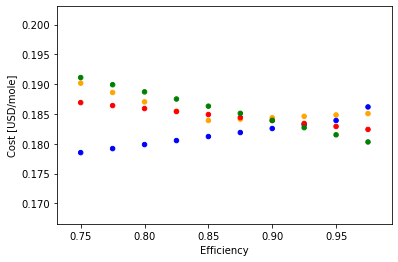

In [34]:
# Here is a really simple plot.
cost_results.plot(
    x="Efficiency",
    y="Cost [USD/mole]",
    c=cost_results["Variable"].apply(lambda v: {
        "Input efficiency[Water]"       : "blue"  ,
        "Input efficiency[Electricity]" : "orange",
        "Output efficiency[Oxygen]"     : "green" ,
        "Output efficiency[Hydrogen]"   : "red"   ,
    }[v]),
    kind="scatter"
)